# Stock Downside Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def downside_risk(stock_returns):
    dr = stock_returns[stock_returns < stock_returns.mean()].std(skipna = True) * np.sqrt(252)
    return dr

Text(0, 0.5, 'Downside Risk')

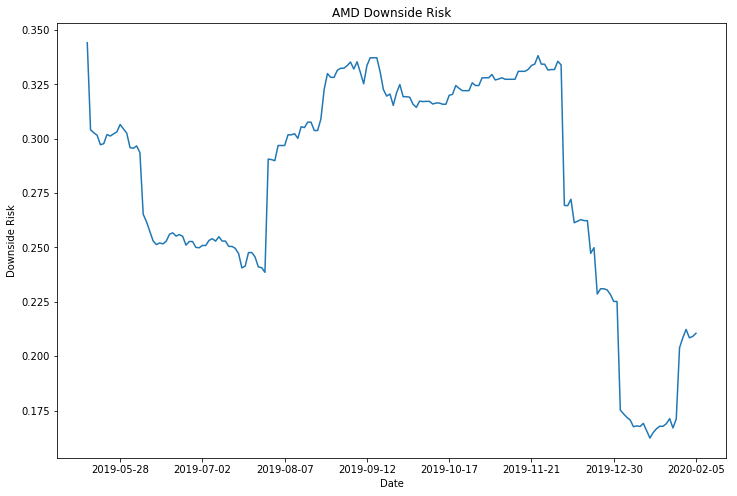

In [6]:
# Compute the running Downside Risk
running = [downside_risk(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Downside Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Downside Risk')
plt.xlabel('Date')
plt.ylabel('Downside Risk')

In [7]:
stock_dr = downside_risk(stocks_returns)
stock_dr

0.38395655251521654

In [8]:
running = [downside_risk(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.34416996991007287,
 0.304104774949138,
 0.30274063813677327,
 0.3015806979764954,
 0.297243464587075,
 0.2977217529184124,
 0.3019291677355564,
 0.3012382087972511,
 0.302235479527127,
 0.30314236267832734,
 0.3065567969193211,
 0.3045065261929521,
 0.3025694783124609,
 0.2958944788064592,
 0.2956334343342449,
 0.2966992359811141,
 0.29362263953104417,
 0.26527043864403893,
 0.26184422136517044,
 0.2574686851835912,
 0.25305635727664555,
 0.2513474897615191,
 0.2520583853666434,
 0.25166143823038983,
 0.2528686081849547,
 0.25608939895882,
 0.25673101450279207,
 0.2552301218264748,
 0.25592408610539435,
 0.25512858108068265,
 0.2510815753097849,
 0.2527426577843561,
 0.2527426577843561,
 0.2500582062285153,
 0.24985251908060788,
 0.2509317477074436,
 0.25089366711919936,
 0.2532458758607174,
 0.2540416230180619,
 0.2529249375786051,
 0.2549560432242239,
 0.25293632306285,
 0.25293632306285,
 0.2504874584390693,
 0.25047297855650413,
 0.2495617471101267,
 0.24713522170155838,
 0.2405